In [2]:
import pickle
from HopDec import Model
from HopDec import Transitions
import pandas as pd

from HopDec.Input import getParams
from HopDec.Vectors import *
import networkx as nx
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('model-checkpoint_latest.pkl', 'rb') as f:
    model = pickle.load(f)

In [7]:
model

In [8]:
model.loadRedecorations()

In [9]:
model.redecorations[0]

,Composition,Decoration,Transition,Initial State,Final State,Forward Barrier,Reverse Barrier,KRA,dE,Init Can Label,Init non-Can Label,Fin Can Label,Fin non-Can Label,Trans Can Label,Trans non-Can Label,Initial Energy,Final Energy
0,"0.5,0.5",1,1,<HopDec.State.State object at 0x1379d14c0>,<HopDec.State.State object at 0x1379d2c90>,0.4757,0.4666,0.4712,0.0091,6fa1f1601d479c45d78adf4a2aa67887,281955a45eb147e84ec39426dcab26ed,79a75c44a9f81637256b868dabd22b1a,f98bdec018f0a80a9f768955a93d39e0,95e22791fd133d08eaa4a97ac0df7283,a1b582d5dc2b7064897e915453e6c766,-3420.369853,-3420.360747
1,"0.5,0.5",2,1,<HopDec.State.State object at 0x1379d25a0>,<HopDec.State.State object at 0x1379d2e10>,1.0371,1.1032,1.0702,-0.0661,342c7cdb77e7715c9e90f2e692f86697,281955a45eb147e84ec39426dcab26ed,3bd989c500465dfe3dc0471e42052727,f98bdec018f0a80a9f768955a93d39e0,44af0b9831f84b6efca7f7bc654baef8,ab5d1455fd0e2b4fa843576b130f8828,-3420.530132,-3420.596228
2,"0.5,0.5",3,1,<HopDec.State.State object at 0x1379d2960>,<HopDec.State.State object at 0x1379d2e40>,0.5404,0.6268,0.5836,-0.0864,6db638ba25d34fd15f86239c2f609c8b,281955a45eb147e84ec39426dcab26ed,eac311070bf2b9d3b11a6e81b2a5e504,fd7da80b0f1ddf383d4a8230b045bf8b,8487624a963b98e70644426dd77ef9f3,0bf26d2d495bcaec7eb580b5b3c37cec,-3420.393480,-3420.479850
3,"0.5,0.5",3,2,<HopDec.State.State object at 0x1379d2a20>,<HopDec.State.State object at 0x1379d2e70>,0.6484,0.4724,0.5604,0.1759,eac311070bf2b9d3b11a6e81b2a5e504,fd7da80b0f1ddf383d4a8230b045bf8b,f4f55baf0ed80f17ced38b6b14df1243,f98bdec018f0a80a9f768955a93d39e0,d297f11b72614517789bf8fafd0fbf20,bb7fdbf03c9f9f406461c05469f5fe44,-3420.479850,-3420.303912
4,"0.5,0.5",4,1,<HopDec.State.State object at 0x1379d2a50>,<HopDec.State.State object at 0x1379d2ea0>,0.7517,0.5641,0.6579,0.1876,edb421d475f3d27475f7c4db21df6d5d,281955a45eb147e84ec39426dcab26ed,6c26bf4bbf2515111d3ab7a62dc89082,f98bdec018f0a80a9f768955a93d39e0,81f0f28521b97de9471fc758c3e0a9b7,ab5d1455fd0e2b4fa843576b130f8828,-3420.491870,-3420.304278
5,"0.5,0.5",5,1,<HopDec.State.State object at 0x1379d2a80>,<HopDec.State.State object at 0x1379d2ed0>,0.4319,0.4508,0.4414,-0.0188,dbb08bb8d12e5a161ded24394a32c6c8,281955a45eb147e84ec39426dcab26ed,1c03258de3e24325bced07763905ac64,fd7da80b0f1ddf383d4a8230b045bf8b,639084072b49c24c6b231e2da554dd08,0bf26d2d495bcaec7eb580b5b3c37cec,-3419.784135,-3419.802974
6,"0.5,0.5",5,2,<HopDec.State.State object at 0x1379d2b40>,<HopDec.State.State object at 0x1379d2f00>,0.4988,0.3118,0.4053,0.1870,1c03258de3e24325bced07763905ac64,fd7da80b0f1ddf383d4a8230b045bf8b,9aa23bb08fd7e26850327fe9f0c4bf88,f98bdec018f0a80a9f768955a93d39e0,88fd197fc9ac7a323f368f994f9ec4e4,d94ee1fc8eefff5fc0119560a5c06972,-3419.802974,-3419.615965
7,"0.5,0.5",6,1,<HopDec.State.State object at 0x1379d2b70>,<HopDec.State.State object at 0x1379d2f30>,0.3285,0.4208,0.3747,-0.0923,fe33da7c29dba87bcfd41bdf45eb2c87,281955a45eb147e84ec39426dcab26ed,33b71570abac63c91a8e961cfd451bd0,f98bdec018f0a80a9f768955a93d39e0,c38830991eac36fd3f8171f96456d225,ab5d1455fd0e2b4fa843576b130f8828,-3421.172270,-3421.264587
8,"0.5,0.5",7,1,<HopDec.State.State object at 0x1379d2ba0>,<HopDec.State.State object at 0x1379d2f60>,0.6537,0.4689,0.5613,0.1848,91667429d7b30f09892216f3c48c3396,281955a45eb147e84ec39426dcab26ed,e42dfd1329b2dbcde8bf5faebc2e71e0,f98bdec018f0a80a9f768955a93d39e0,5c8d2cfb3d2d1dd19c096ff53df210aa,ab5d1455fd0e2b4fa843576b130f8828,-3420.496840,-3420.311999
9,"0.5,0.5",8,1,<HopDec.State.State object at 0x1379d2c60>,<HopDec.State.State object at 0x1379d2fc0>,0.3697,0.4036,0.3866,-0.0338,01b742fa14be4ba48eac98608a4bb933,281955a45eb147e84ec39426dcab26ed,a13cf3d54b8230ce47d5a8e5cd85dec6,f98bdec018f0a80a9f768955a93d39e0,73ede397388a9e2d5589a51c881a436b,a1b582d5dc2b7064897e915453e6c766,-3420.674404,-3420.708251


In [10]:
model.transitionList[0].loadRedecoration()

,Composition,Decoration,Transition,Initial State,Final State,Forward Barrier,Reverse Barrier,KRA,dE,Init Can Label,Init non-Can Label,Fin Can Label,Fin non-Can Label,Trans Can Label,Trans non-Can Label,Initial Energy,Final Energy
0,"0.5,0.5",1,1,<HopDec.State.State object at 0x1379d3da0>,<HopDec.State.State object at 0x1379d3b30>,0.4757,0.4666,0.4712,0.0091,6fa1f1601d479c45d78adf4a2aa67887,281955a45eb147e84ec39426dcab26ed,79a75c44a9f81637256b868dabd22b1a,f98bdec018f0a80a9f768955a93d39e0,95e22791fd133d08eaa4a97ac0df7283,a1b582d5dc2b7064897e915453e6c766,-3420.369853,-3420.360747
1,"0.5,0.5",2,1,<HopDec.State.State object at 0x1379d3a70>,<HopDec.State.State object at 0x1379d1550>,1.0371,1.1032,1.0702,-0.0661,342c7cdb77e7715c9e90f2e692f86697,281955a45eb147e84ec39426dcab26ed,3bd989c500465dfe3dc0471e42052727,f98bdec018f0a80a9f768955a93d39e0,44af0b9831f84b6efca7f7bc654baef8,ab5d1455fd0e2b4fa843576b130f8828,-3420.530132,-3420.596228
2,"0.5,0.5",3,1,<HopDec.State.State object at 0x125e86750>,<HopDec.State.State object at 0x1379d2390>,0.5404,0.6268,0.5836,-0.0864,6db638ba25d34fd15f86239c2f609c8b,281955a45eb147e84ec39426dcab26ed,eac311070bf2b9d3b11a6e81b2a5e504,fd7da80b0f1ddf383d4a8230b045bf8b,8487624a963b98e70644426dd77ef9f3,0bf26d2d495bcaec7eb580b5b3c37cec,-3420.393480,-3420.479850
3,"0.5,0.5",3,2,<HopDec.State.State object at 0x11278f230>,<HopDec.State.State object at 0x1379d22a0>,0.6484,0.4724,0.5604,0.1759,eac311070bf2b9d3b11a6e81b2a5e504,fd7da80b0f1ddf383d4a8230b045bf8b,f4f55baf0ed80f17ced38b6b14df1243,f98bdec018f0a80a9f768955a93d39e0,d297f11b72614517789bf8fafd0fbf20,bb7fdbf03c9f9f406461c05469f5fe44,-3420.479850,-3420.303912
4,"0.5,0.5",4,1,<HopDec.State.State object at 0x1379d3d10>,<HopDec.State.State object at 0x1379d2bd0>,0.7517,0.5641,0.6579,0.1876,edb421d475f3d27475f7c4db21df6d5d,281955a45eb147e84ec39426dcab26ed,6c26bf4bbf2515111d3ab7a62dc89082,f98bdec018f0a80a9f768955a93d39e0,81f0f28521b97de9471fc758c3e0a9b7,ab5d1455fd0e2b4fa843576b130f8828,-3420.491870,-3420.304278
5,"0.5,0.5",5,1,<HopDec.State.State object at 0x1379d1490>,<HopDec.State.State object at 0x1379d3500>,0.4319,0.4508,0.4414,-0.0188,dbb08bb8d12e5a161ded24394a32c6c8,281955a45eb147e84ec39426dcab26ed,1c03258de3e24325bced07763905ac64,fd7da80b0f1ddf383d4a8230b045bf8b,639084072b49c24c6b231e2da554dd08,0bf26d2d495bcaec7eb580b5b3c37cec,-3419.784135,-3419.802974
6,"0.5,0.5",5,2,<HopDec.State.State object at 0x1379d1070>,<HopDec.State.State object at 0x1379d2b10>,0.4988,0.3118,0.4053,0.1870,1c03258de3e24325bced07763905ac64,fd7da80b0f1ddf383d4a8230b045bf8b,9aa23bb08fd7e26850327fe9f0c4bf88,f98bdec018f0a80a9f768955a93d39e0,88fd197fc9ac7a323f368f994f9ec4e4,d94ee1fc8eefff5fc0119560a5c06972,-3419.802974,-3419.615965
7,"0.5,0.5",6,1,<HopDec.State.State object at 0x1379d3a40>,<HopDec.State.State object at 0x1379d3470>,0.3285,0.4208,0.3747,-0.0923,fe33da7c29dba87bcfd41bdf45eb2c87,281955a45eb147e84ec39426dcab26ed,33b71570abac63c91a8e961cfd451bd0,f98bdec018f0a80a9f768955a93d39e0,c38830991eac36fd3f8171f96456d225,ab5d1455fd0e2b4fa843576b130f8828,-3421.172270,-3421.264587
8,"0.5,0.5",7,1,<HopDec.State.State object at 0x1379d3b00>,<HopDec.State.State object at 0x1379d2c30>,0.6537,0.4689,0.5613,0.1848,91667429d7b30f09892216f3c48c3396,281955a45eb147e84ec39426dcab26ed,e42dfd1329b2dbcde8bf5faebc2e71e0,f98bdec018f0a80a9f768955a93d39e0,5c8d2cfb3d2d1dd19c096ff53df210aa,ab5d1455fd0e2b4fa843576b130f8828,-3420.496840,-3420.311999
9,"0.5,0.5",8,1,<HopDec.State.State object at 0x1379d3a10>,<HopDec.State.State object at 0x1379d3650>,0.3697,0.4036,0.3866,-0.0338,01b742fa14be4ba48eac98608a4bb933,281955a45eb147e84ec39426dcab26ed,a13cf3d54b8230ce47d5a8e5cd85dec6,f98bdec018f0a80a9f768955a93d39e0,73ede397388a9e2d5589a51c881a436b,a1b582d5dc2b7064897e915453e6c766,-3420.674404,-3420.708251


In [11]:
for trans in model.transitionList:
    print(trans.redecoration)
    print(trans.forwardBarrier)

./8ef1a3130c3dcca685f5117f5950c1e3_ab5d1455fd0e2b4fa843576b130f8828
0.4269


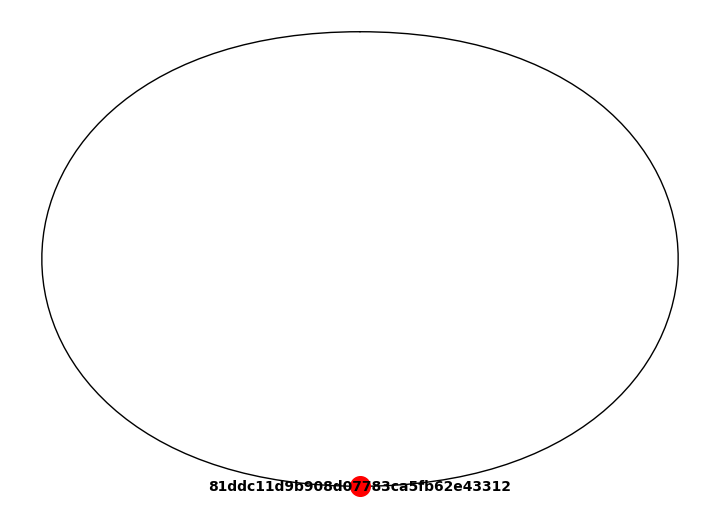

In [12]:
canonicalLabelsTrans = [ [ trans.initialState.canLabel, trans.finalState.canLabel  ] for trans in model.transitionList ]

G = nx.Graph()

G.add_edges_from(canonicalLabelsTrans)

pos = nx.spring_layout(G, seed=42)
# pos = nx.circular_layout(G)
# pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(7,5
                    ))

nx.draw(G, pos,with_labels=True, node_color='red', node_size=200, font_size=10, font_weight='bold',width = 1)


In [13]:
rows = []
for t,trans in enumerate(model.transitionList):
    rows.append({'trans ID' : t, 'I Can Label' : trans.initialState.canLabel, 'F Can Label' : trans.finalState.canLabel, 'F Bar' : trans.forwardBarrier,'dE' : trans.dE})

    
df = pd.DataFrame(rows)
df.sort_values(by=['dE','F Bar'])
    

,trans ID,I Can Label,F Can Label,F Bar,dE
0,0,81ddc11d9b908d07783ca5fb62e43312,81ddc11d9b908d07783ca5fb62e43312,0.4269,-0.0


In [4]:
for t,trans in enumerate(model.transitionList):
    trans.exportStructure('trans',f'{t}')

[28/03/25, 14:12:40]: Transitions >> Saving NEB Structure to 'trans/0'
[28/03/25, 14:12:40]: Transitions >> Saving NEB Structure to 'trans/1'
[28/03/25, 14:12:40]: Transitions >> Saving NEB Structure to 'trans/2'
[28/03/25, 14:12:40]: Transitions >> Saving NEB Structure to 'trans/3'
[28/03/25, 14:12:40]: Transitions >> Saving NEB Structure to 'trans/4'
[28/03/25, 14:12:40]: Transitions >> Saving NEB Structure to 'trans/5'
